In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir(r'C:\Users\ramee\Downloads')

# Import the data

In [3]:
df=pd.read_csv("application_data.csv")

In [4]:
PA=pd.read_csv("previous_application.csv")

In [5]:
CAD=pd.read_csv('columns_description.csv', encoding='unicode_escape', index_col=0)

# understanding the required data

read and understand the application data

In [6]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape

(307511, 122)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Checking and handling of Missing Values

In [10]:
result=round((df.isnull().sum()/len(df)*100),2)
result.sort_values()

SK_ID_CURR                      0.00
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
                               ...  
NONLIVINGAPARTMENTS_MEDI       69.43
NONLIVINGAPARTMENTS_MODE       69.43
COMMONAREA_MODE                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MEDI                69.87
Length: 122, dtype: float64

In [11]:
missing_data=pd.DataFrame(result).reset_index()
missing_data

,index,0
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,NAME_CONTRACT_TYPE,0.0
3,CODE_GENDER,0.0
4,FLAG_OWN_CAR,0.0
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.5
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.5
119,AMT_REQ_CREDIT_BUREAU_MON,13.5
120,AMT_REQ_CREDIT_BUREAU_QRT,13.5


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121]),
 [Text(0, 0, 'SK_ID_CURR'),
  Text(1, 0, 'TARGET'),
  Text(2, 0, 'NAME_CONTRACT_TYPE'),
  Text(3, 0, 'CODE_GENDER'),
  Text(4, 0, 'FLAG_OWN_CAR'),
  Text(5, 0, 'FLAG_OWN_REALTY'),
  Text(6, 0, 'CNT_CHILDREN'),
  Text(7, 0, 'AMT_INCOME_TOTAL'),
  Text(8, 0, 'AMT_CREDIT'),
  Text(9, 0, 'AMT_ANNUITY'),
  Text(

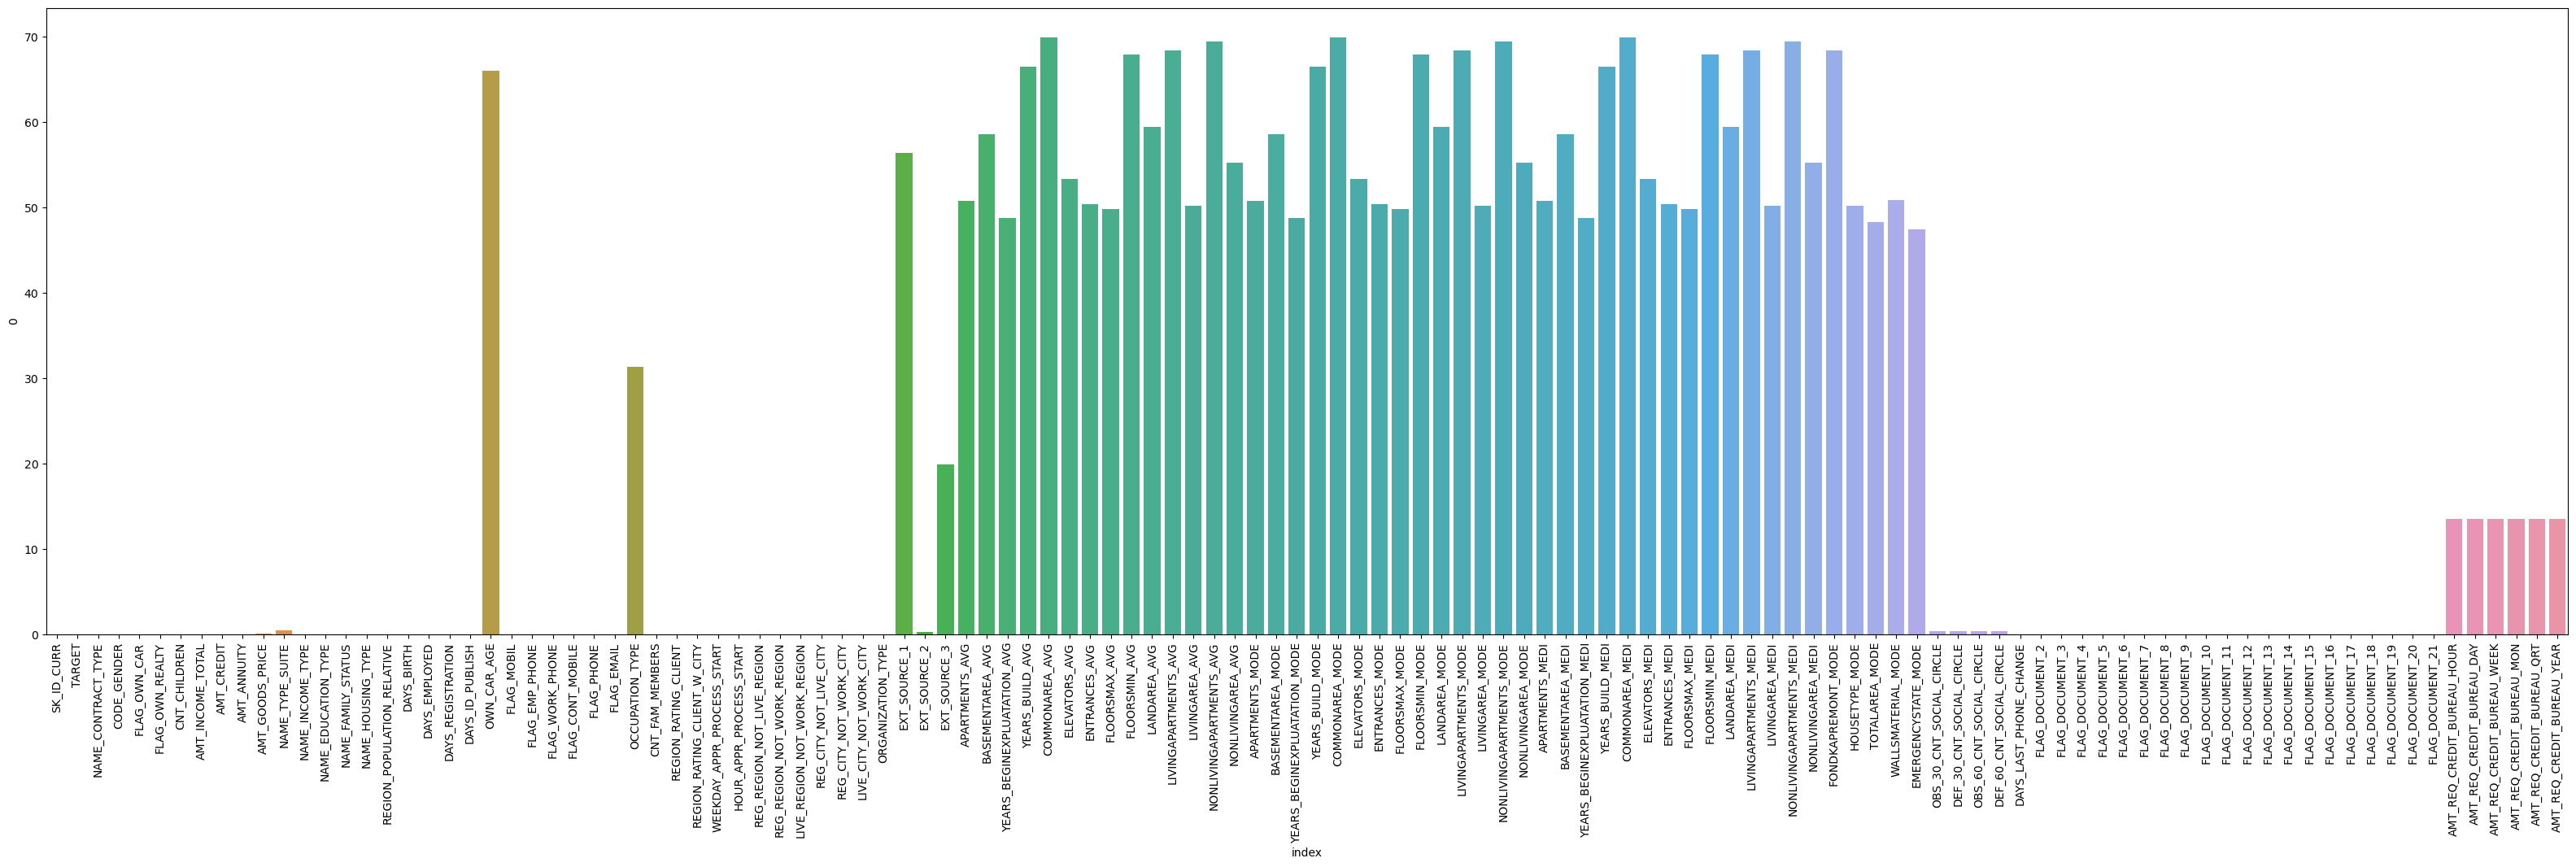

In [12]:
plt.figure(figsize=(40,10))
sns.barplot(missing_data,x=missing_data["index"],y=missing_data[0])
plt.xticks(rotation=90)




dropping the columns having null values more than 40% 

In [13]:
result[result>40]

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [14]:
miss=result[result>40]

In [15]:
miss.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [16]:
df=df.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
            'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],axis=1)

In [17]:
df.shape

(307511, 73)

columns with missing values less than 40%

In [18]:
mv=result[(result<40)&(result>0)]

In [19]:
mv

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OCCUPATION_TYPE               31.35
EXT_SOURCE_2                   0.21
EXT_SOURCE_3                  19.83
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64

In [20]:
mv.index

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

# Checking for outliers

check the outliers in the columns having null values less than 40%

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Count'>

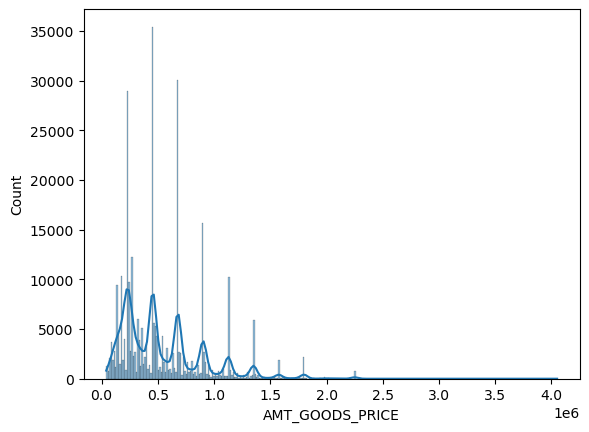

In [21]:
sns.histplot(df["AMT_GOODS_PRICE"],kde=True)

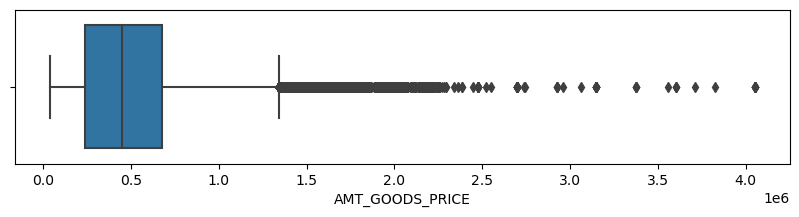

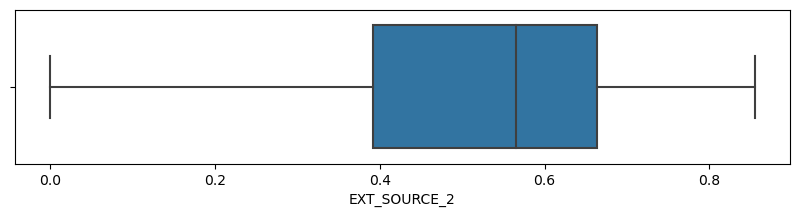

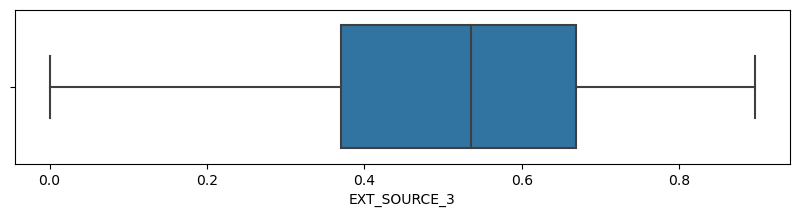

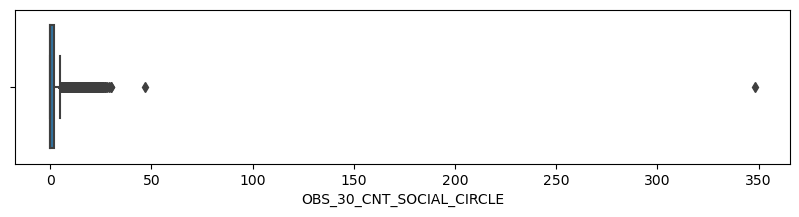

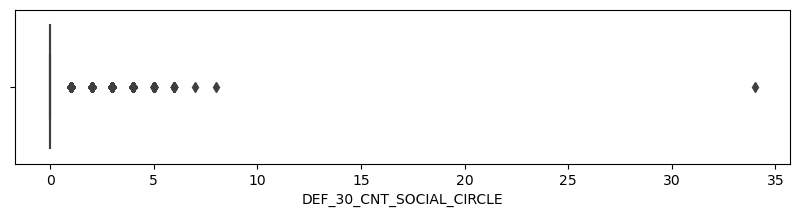

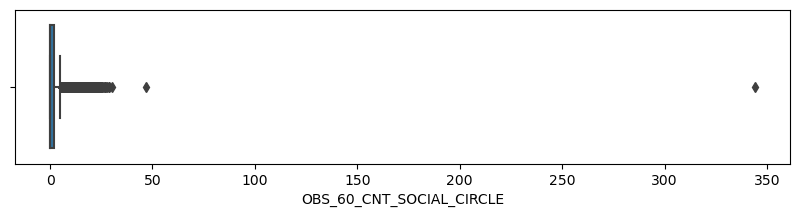

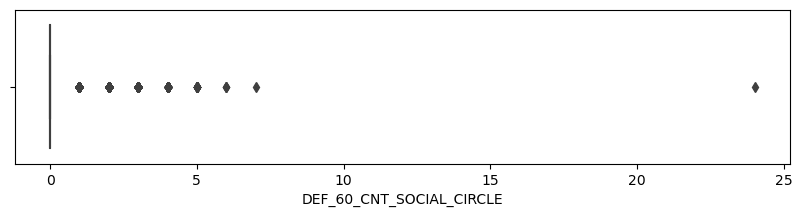

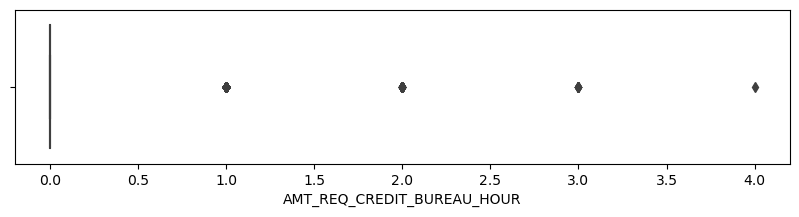

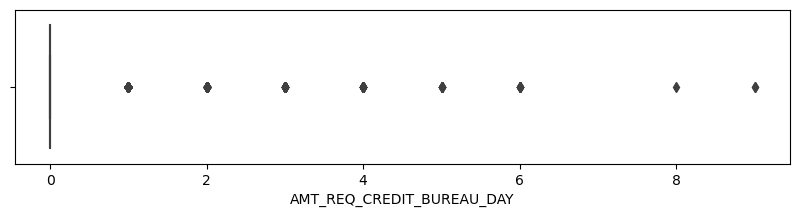

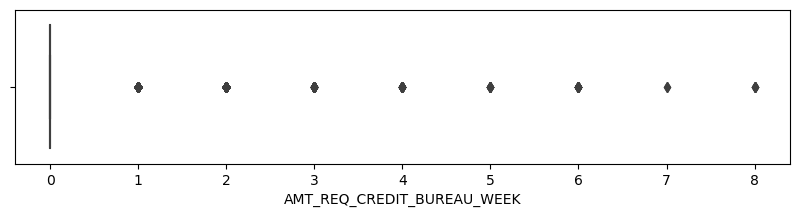

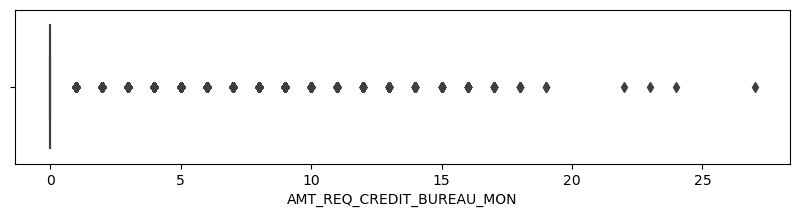

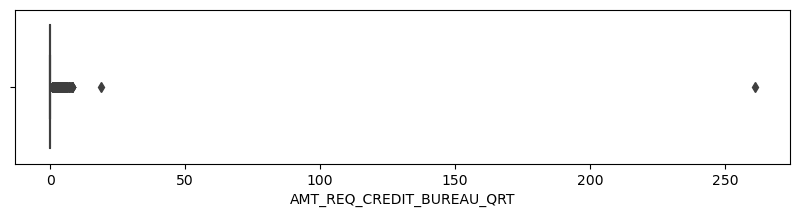

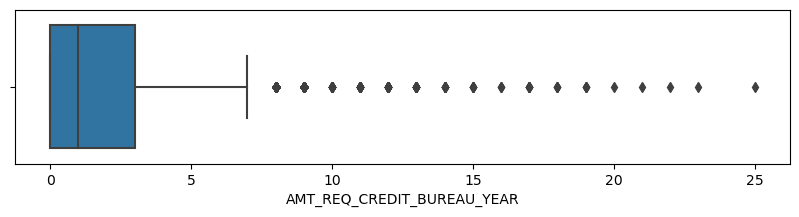

In [22]:
list1=['AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in list1:
    plt.figure(figsize=(10,2)) 
    sns.boxplot(x=df[i]) 
    plt.show()

In [23]:
df[['AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.072330e+05,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,5.383962e+05,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,3.694465e+05,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,4.050000e+04,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.385000e+05,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.795000e+05,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.050000e+06,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000




from the above analysis we are having following observation and assumptions:

- EXT_SOURCE_2,EXT_SOURCE_3 are hot having any outliers and the mean and median value is almost same so we can impute them   by mean or median.
- AMT_GOODS_PRICE has an outliers and thier is a huge difference between the 3rd quartile and the max value, in box plot we   can see that maximum value lie near the 3rd quartile so we impute the null values as median. 
- remaining columns also have the outliers and a huge between the 3rd quartile and max. we can impute the null values as     median. 



In [24]:
df["AMT_GOODS_PRICE"].median()

450000.0

In [25]:
df["AMT_GOODS_PRICE"].fillna('450000.0',inplace=True)

In [26]:
df["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0.0,inplace=True)

In [27]:
df["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0.0,inplace=True)

In [28]:
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0.0,inplace=True)

In [29]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0.0,inplace=True)

In [30]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0.0,inplace=True)

In [31]:
df["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0.0,inplace=True)

In [32]:
df["EXT_SOURCE_3"].fillna(0.5,inplace=True)

In [33]:
df["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0.0,inplace=True)

In [34]:
df["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0.0,inplace=True)

In [35]:
df["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0.0,inplace=True)

In [36]:
df["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0.0,inplace=True)

In [37]:
df["EXT_SOURCE_2"].fillna(0.5,inplace=True)

In [38]:
df["EXT_SOURCE_3"].fillna(0.5,inplace=True)

In [39]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
NAME_TYPE_SUITE                 0.420148
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

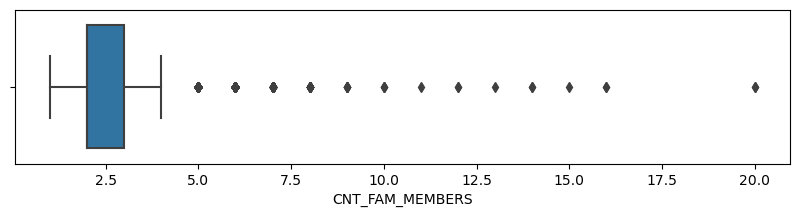

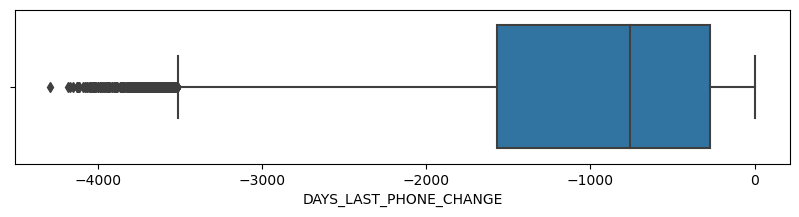

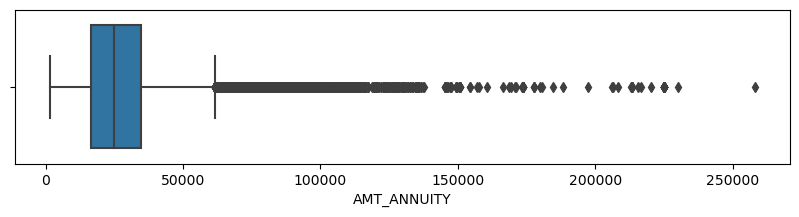

In [40]:
s=['CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE','AMT_ANNUITY']
for i in s:
    plt.figure(figsize=(10,2)) 
    sns.boxplot(x=df[i]) 
    plt.show()

In [41]:
df[['CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE','AMT_ANNUITY']].describe()

,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_ANNUITY
count,307509.000000,307510.000000,307499.000000
mean,2.152665,-962.858788,27108.573909
std,0.910682,826.808487,14493.737315
min,1.000000,-4292.000000,1615.500000
25%,2.000000,-1570.000000,16524.000000
50%,2.000000,-757.000000,24903.000000
75%,3.000000,-274.000000,34596.000000
max,20.000000,0.000000,258025.500000


<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

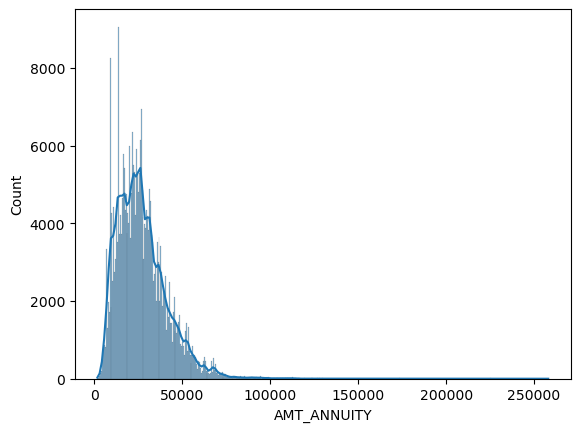

In [42]:
sns.histplot(df['AMT_ANNUITY'],kde=True)


- As we can see that there is an outliers in the column of CNT_FAM_MEMBERS, and the 3rd quartile and max value has big       difference,so we will impute the null value as median that is 2. 

- AMT_ANNUITY has an outliers and also we can see by above analysis there is large difference between quantiles and also in   mean,median and mode. so if we replace null values by any of these it will make a huge difference in the data so keep it   as a zero.

- DAYS_LAST_PHONE_CHANGE has an outliers and also we can see their are negative values in it so will change it to absolute
  and because of large difference between the max and 3rd quartile, so we will impute them as mode.
  

In [43]:
df["CNT_FAM_MEMBERS"].fillna(2.0,inplace=True)

In [44]:
df["AMT_ANNUITY"].fillna('0.0',inplace=True)

In [45]:
df['DAYS_LAST_PHONE_CHANGE'].fillna(0.0,inplace=True)

In [46]:
df['DAYS_LAST_PHONE_CHANGE']=abs(df['DAYS_LAST_PHONE_CHANGE'])

In [47]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
NAME_TYPE_SUITE                0.420148
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_7                0.000000
                                ...    
FLAG_CONT_MOBILE               0.000000
FLAG_WORK_PHONE                0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_MOBIL                     0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64





NAME_TYPE_SUITE and OCCUPATION_TYPE are a categorical columns, and they have large no of missing values so cannot impute it with the mean, median or mode value because it may affect the data, so we replace it with unknown.


In [48]:
df["NAME_TYPE_SUITE"].fillna('Unknown',inplace=True)

In [49]:
df.loc[df['OCCUPATION_TYPE']== ' ',"OCCUPATION_TYPE"] = np.nan
df.OCCUPATION_TYPE= df.OCCUPATION_TYPE.replace(np.nan, "unknown")

In [50]:
df['OCCUPATION_TYPE'].value_counts()

unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

# Standardaizing of columns

 DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH have the nagative values also it is difficult to understand the time period, so i convert this columns in years with making a new columns and dropping the old columns

In [51]:
df["Age"]=round(abs(df["DAYS_BIRTH"]/365.25))

In [52]:
df=df.drop(["DAYS_BIRTH"],axis=1)

In [53]:
df["EMPLOYED_years"]=round(abs(df["DAYS_EMPLOYED"]/365.25))

In [54]:
df["REGISTRATION"]=round(abs(df["DAYS_REGISTRATION"]/365.25))

In [55]:
df["ID_PUBLISH"]=round(abs(df["DAYS_ID_PUBLISH"]/365.25))

In [56]:
df=df.drop(["DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"],axis=1)

In [57]:
df.shape

(307511, 73)

# diffrentiate between categorical columns and numerial columns

In [58]:
columns_categorical=df.select_dtypes(include=['object']).columns.tolist() 

In [59]:
print(columns_categorical)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [60]:
columns_numeric=df.select_dtypes(include=['int64','float64']).columns.tolist() 

In [61]:
print(columns_numeric)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FL

# UNIVARIATE Ananlysis

In [62]:
df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In the code gender column there are some missing values as xna, we replace it with 'F' as it is in the maximum in number

In [63]:
df.CODE_GENDER= df.CODE_GENDER.replace('XNA', "F")

<Axes: ylabel='CODE_GENDER'>

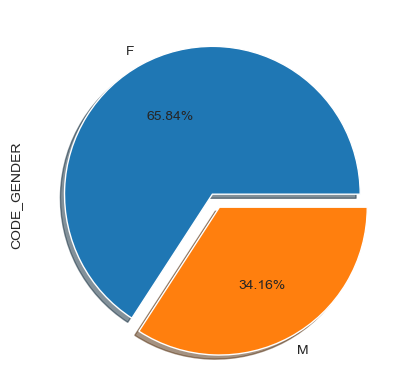

In [64]:
sns.set_style("dark")
exp1= [0,0.1]
df["CODE_GENDER"].value_counts().plot.pie(explode = exp1 ,autopct='%.2f%%',shadow=True)

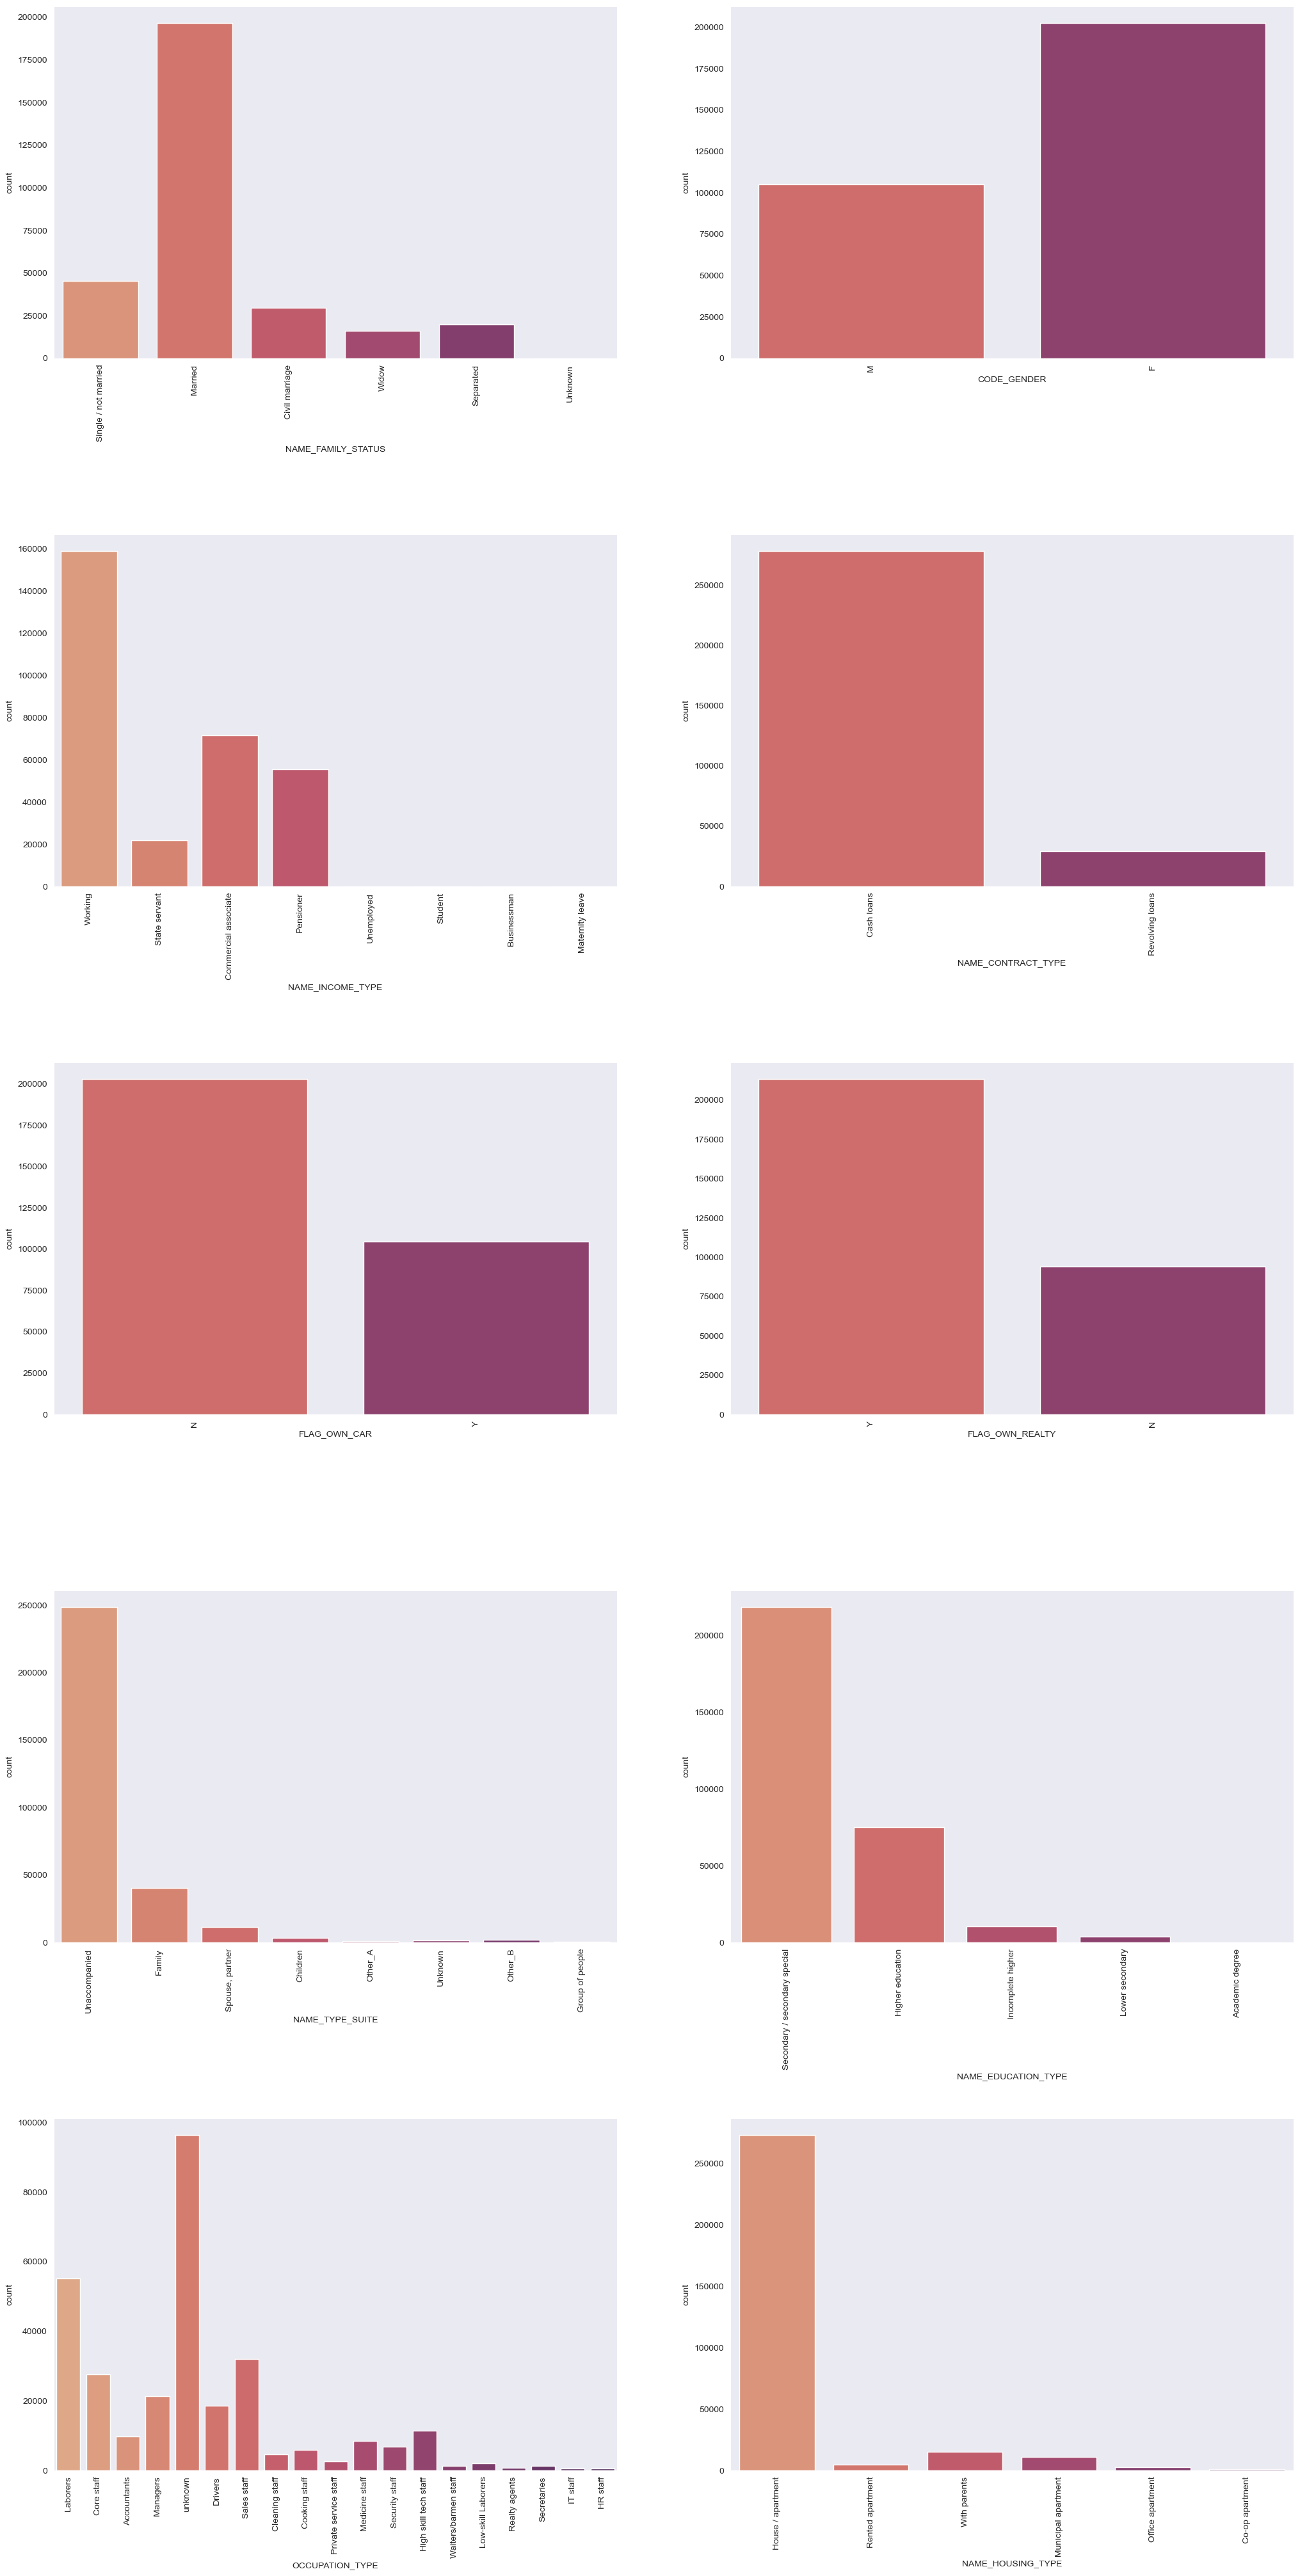

In [65]:
flow = ['NAME_FAMILY_STATUS','CODE_GENDER', 'NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY',
        'NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE']
plt.figure(figsize = (25, 50))
sns.set_style("dark")
for i in enumerate(flow):
    plt.subplot(5, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], data = df,palette="flare")
    
    plt.rcParams['axes.titlesize'] = 30
    
    plt.xticks(rotation = 90)
    plt.yscale('linear')

# BIVARIATE ANALYSIS

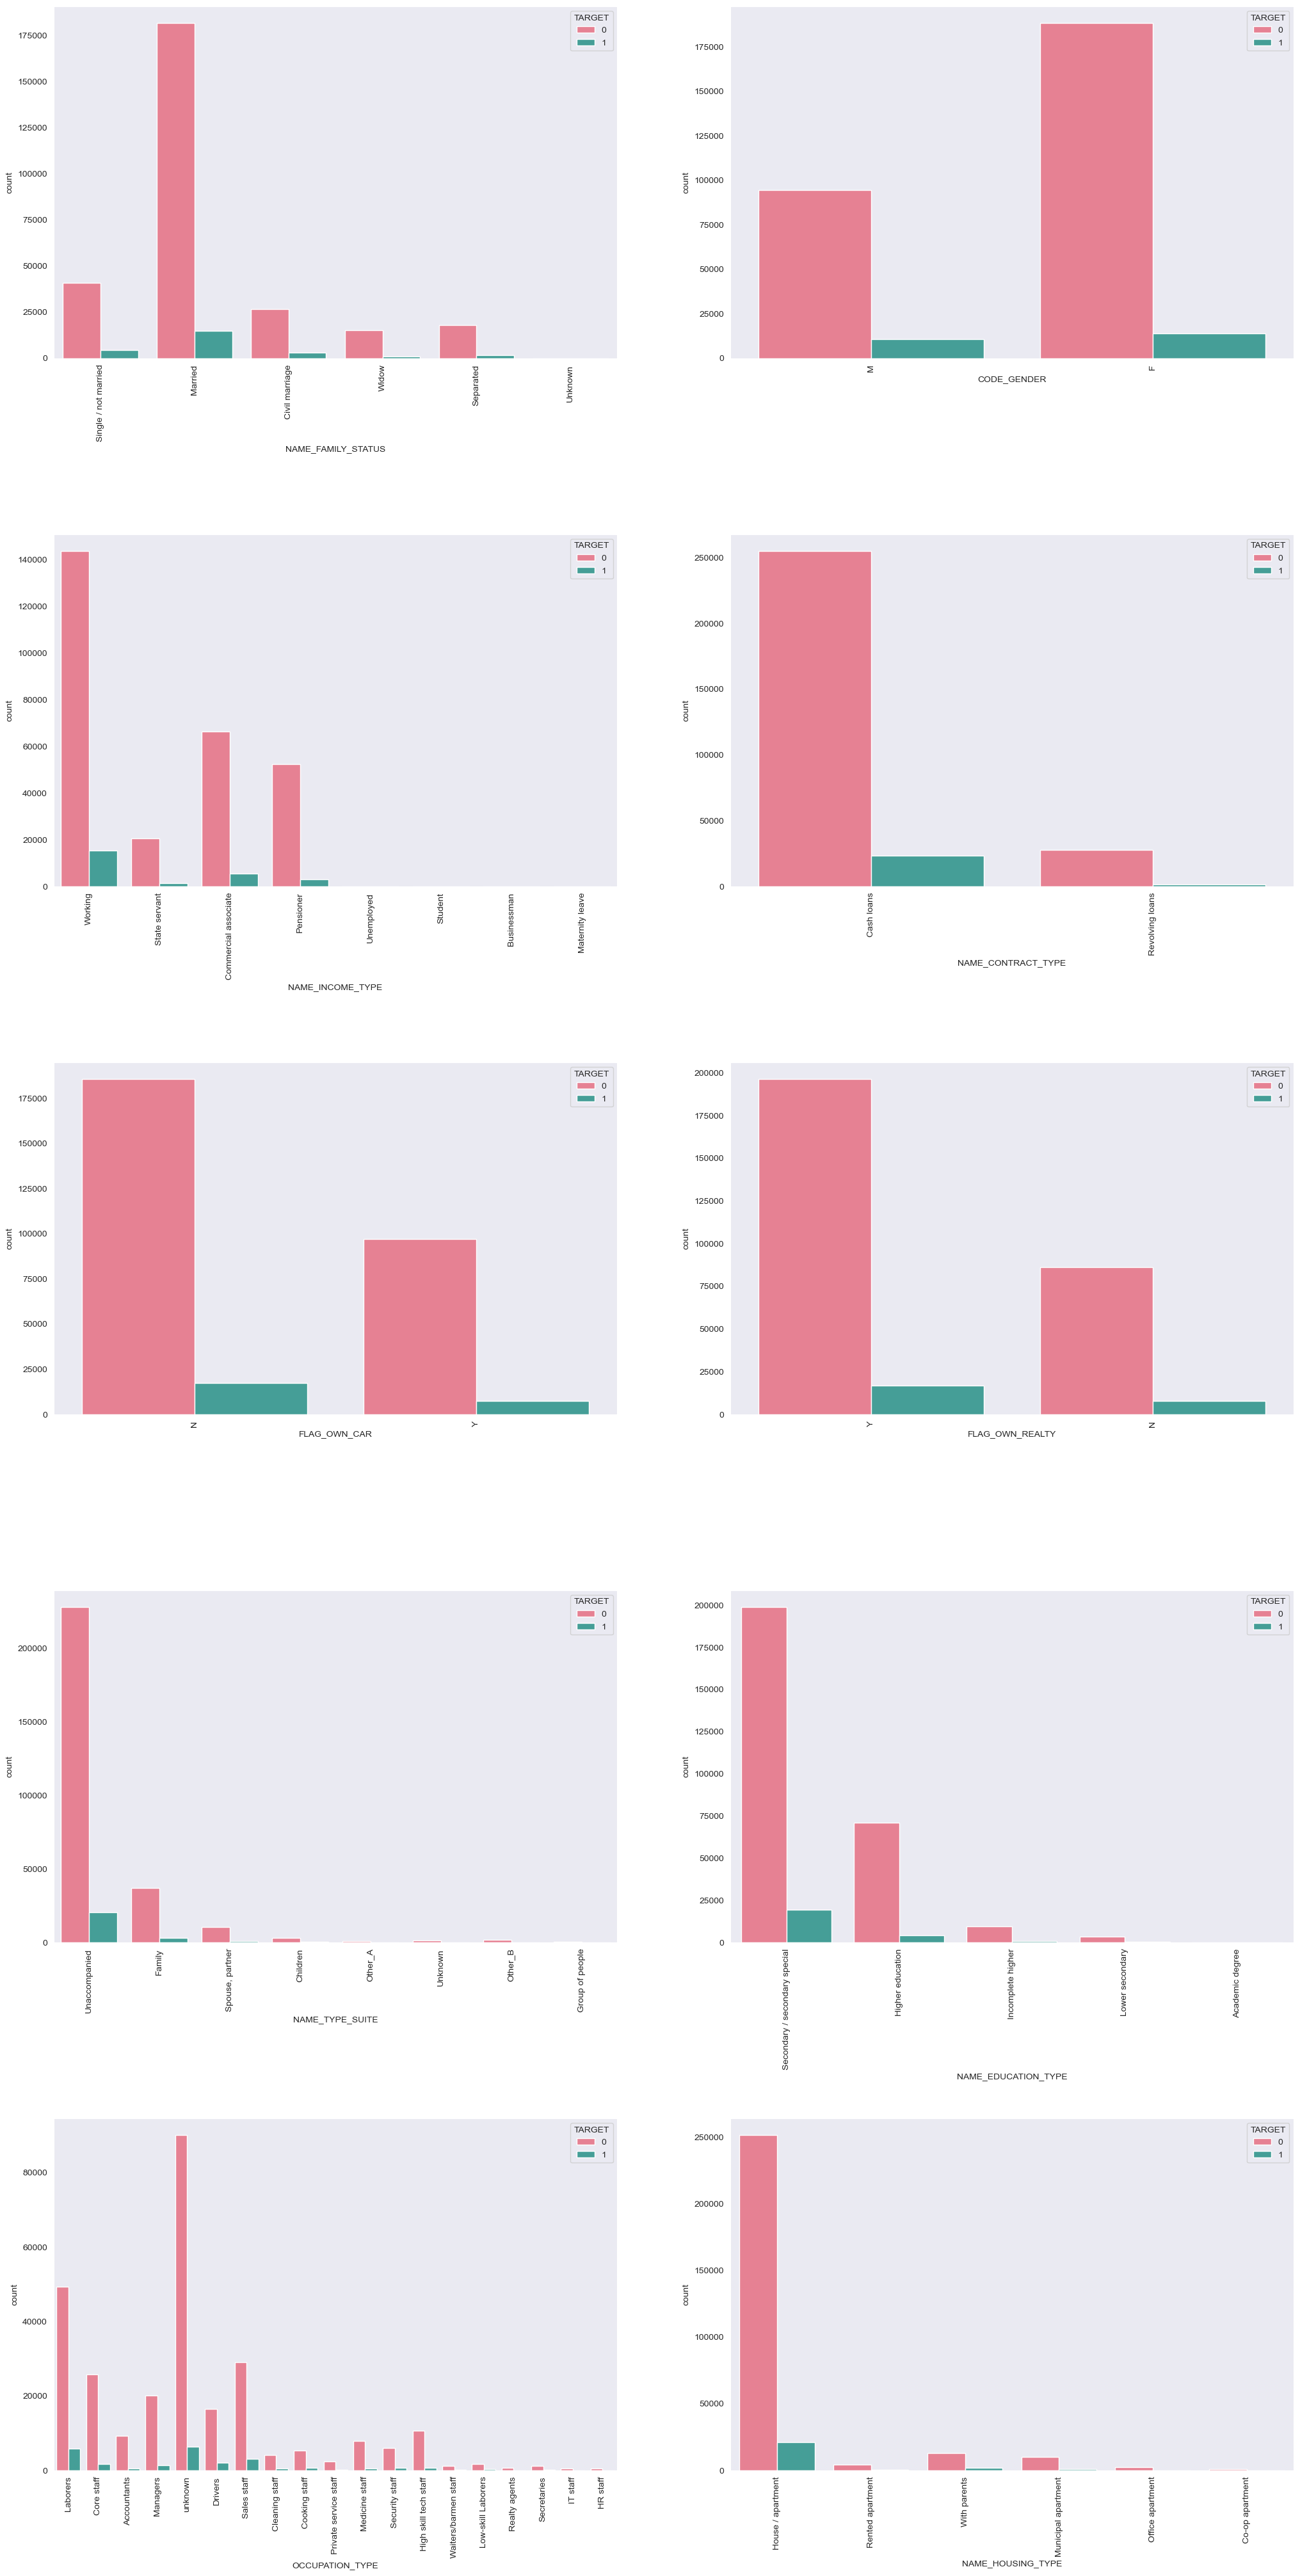

In [66]:
flow = ['NAME_FAMILY_STATUS','CODE_GENDER', 'NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY',
        'NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE']
plt.figure(figsize = (25, 50))
sns.set_style("dark")
for i in enumerate(flow):
    plt.subplot(5, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], data = df,palette="husl",hue="TARGET")
    
    plt.rcParams['axes.titlesize'] = 30
    
    plt.xticks(rotation = 90)
    plt.yscale('linear')

Observations:

Target1 : The client with payment difficulties, 
Target0 : The all other type.(repayer)

CODE_GENDER:

- The % of defaulters are more in Female than Male.

NAME_INCOME_TYPE:

- Student and businessman are higher in percentage of loan repayment.
- Working, State servent and Commercial associates are higher in default percentage.
- Maternity category is significantly higher problem in repayment.

NAME_CONTRACT_TYPE

- For contract type ‘Cash loans’ are high in number of credits than ‘Revolving loans’ contract type.
- By above graph 'Revolving loans' is small amount compared to ‘Cash loans’ 

OCCUPATION_TYPE

- HR staff, Secretaries, Realty agents and IT staff are very less in  both.
- Laborers, Drivers and Low skill Laborers are higher in percentage of loan repayment. 

NAME_HOUSING_TYPE

- people living in House apartment are more in percentage of loan repayment.

NAME_EDUCATION_TYPE

- People are having secondary education and higher education are significantly higher in loan repayment.


NAME_FAMILY_STATUS

- married are higher with non difficulties with payment.

FLAG_OWN_REALTY and FLAG_OWN_CAR

- The people who having realty and not having car are having significantly higher in payment with difficulties.


NAME_TYPE_SUITE

- The people unacompanied are more in percentage of loan repayment.




# Ratio of Data Imbalance

To check the data is balance or not we will count the values in the target column in the application data.

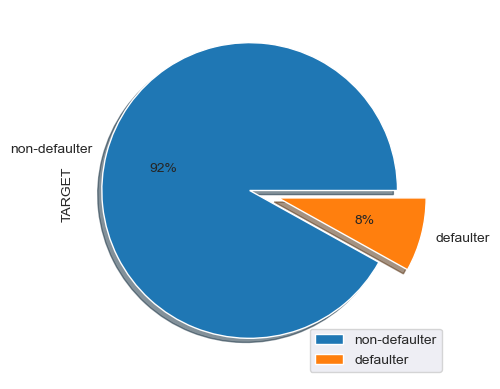

In [67]:
exp = [0.1,0.1]
df['TARGET'].value_counts().plot.pie(explode=exp,autopct='%.0f%%',labels=["non-defaulter","defaulter"],shadow=True)
plt.legend(loc="lower right")

- from the above observation we can say that the data is highly imbalanced.
- To find the ratio of imbalace divide the data into two parts as Target1 is the client with payment difficulties, and       Target0 is the all other type.then divide the lenght of the data which will give us the data imbalance ratio.


In [68]:
Target1=df[df['TARGET']==1]

In [69]:
Target0=df[df['TARGET']==0]

In [70]:
r_imb=round(len(Target0)/len(Target1),2)
print("Data Imbalanced Ratio :", r_imb)

Data Imbalanced Ratio : 11.39


The data imbalanced ratio is 11.39 

From the above analysis we can say that the data is highly imbalanced


# understand the previous loan application data

In [71]:
PA.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
PA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [73]:
PA.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [74]:
PA.shape

(1670214, 37)

# checking null values 

In [75]:
result1=round(((PA.isnull().sum()/len(PA))*100),2)
result1.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [76]:
missed_data=pd.DataFrame(result1).reset_index()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'SK_ID_PREV'),
  Text(1, 0, 'SK_ID_CURR'),
  Text(2, 0, 'NAME_CONTRACT_TYPE'),
  Text(3, 0, 'AMT_ANNUITY'),
  Text(4, 0, 'AMT_APPLICATION'),
  Text(5, 0, 'AMT_CREDIT'),
  Text(6, 0, 'AMT_DOWN_PAYMENT'),
  Text(7, 0, 'AMT_GOODS_PRICE'),
  Text(8, 0, 'WEEKDAY_APPR_PROCESS_START'),
  Text(9, 0, 'HOUR_APPR_PROCESS_START'),
  Text(10, 0, 'FLAG_LAST_APPL_PER_CONTRACT'),
  Text(11, 0, 'NFLAG_LAST_APPL_IN_DAY'),
  Text(12, 0, 'RATE_DOWN_PAYMENT'),
  Text(13, 0, 'RATE_INTEREST_PRIMARY'),
  Text(14, 0, 'RATE_INTEREST_PRIVILEGED'),
  Text(15, 0, 'NAME_CASH_LOAN_PURPOSE'),
  Text(16, 0, 'NAME_CONTRACT_STATUS'),
  Text(17, 0, 'DAYS_DECISION'),
  Text(18, 0, 'NAME_PAYMENT_TYPE'),
  Text(19, 0, 'CODE_REJECT_REASON'),
  Text(20, 0, 'NAME_TYPE_SUITE'),
  Text(21, 0, 'NAME_CLIENT_TYPE'),
  Text(22, 0, 'NAME_GOODS_CATEGO

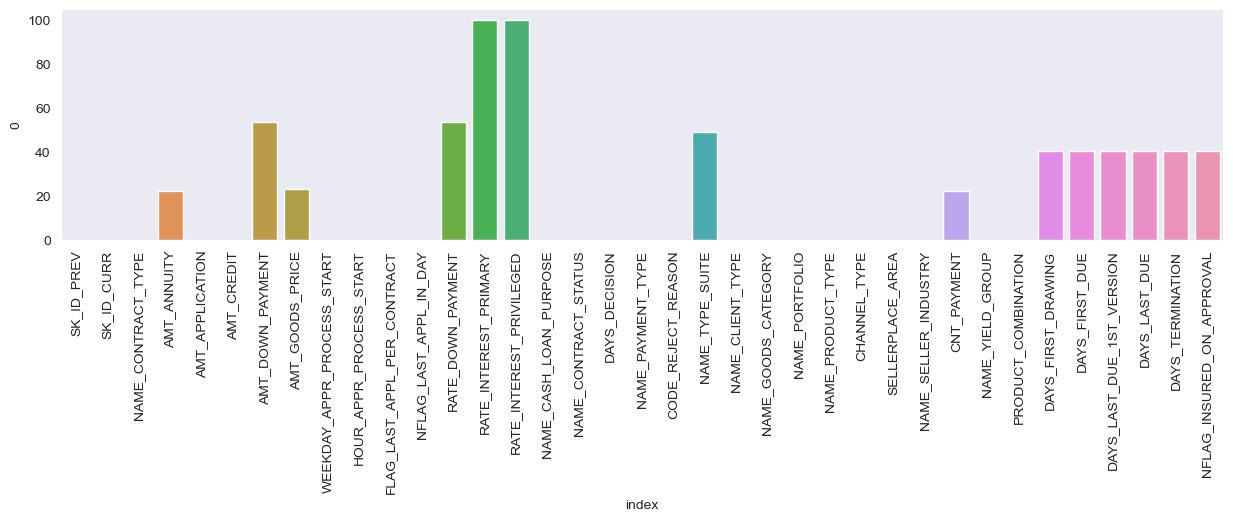

In [83]:
plt.figure(figsize=(15,3))
sns.barplot(missed_data,x=missed_data["index"],y=missed_data[0])
plt.xticks(rotation=90)


Remove the null values more than 50%

In [87]:
PA=PA.drop(['AMT_DOWN_PAYMENT','RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','RATE_DOWN_PAYMENT'],axis=1)

In [88]:
pacolumns_categorical=PA.select_dtypes(include=['object']).columns.tolist()
print(pacolumns_categorical)

['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [89]:
pacolumns_numeric=PA.select_dtypes(include=['int64','float64']).columns.tolist() 
print(pacolumns_numeric)

['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


# checking the outliers

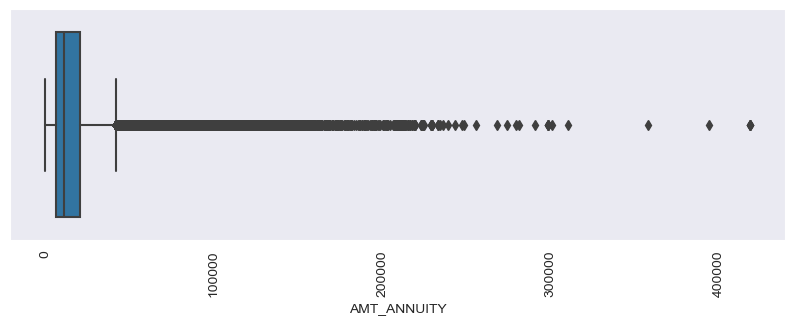

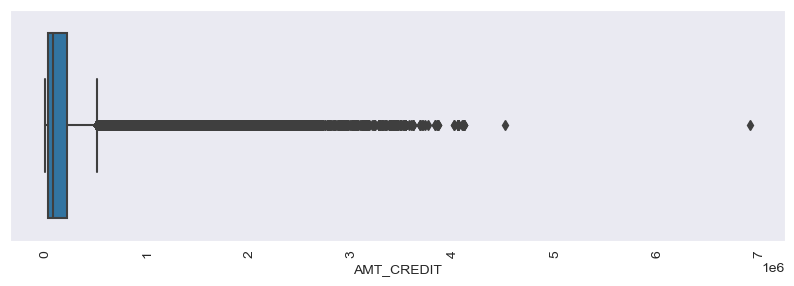

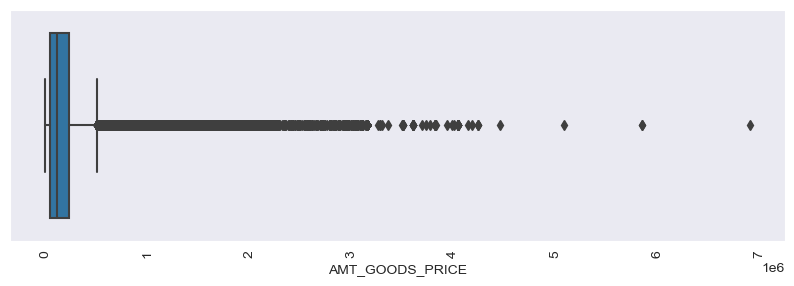

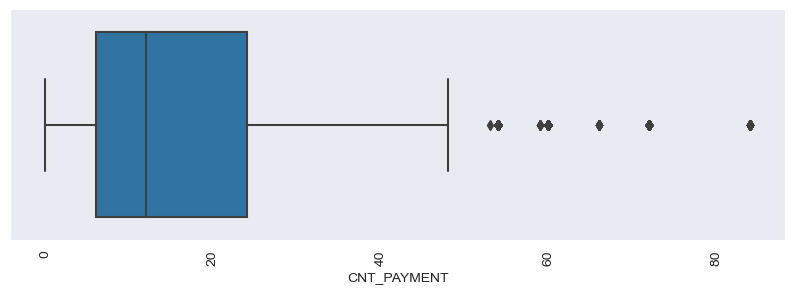

In [90]:
listnum=['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE',  'CNT_PAYMENT']

for i in listnum:
    plt.figure(figsize=(10,3)) 
    sns.boxplot(x=PA[i])
    plt.xticks(rotation=90) 
    plt.show()    

From the above observation there are outliers in the columns, we will create the bins for this columns to handle the outliers.

In [91]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

PA['AMT_CREDIT'] = pd.cut(PA['AMT_CREDIT'], bins = bins, labels=slots)


In [92]:
PA['AMT_CREDIT'].value_counts()

<100000             600007
100000-200000       295054
500000 and above    181720
200000-300000       137655
400000-500000        61640
300000-400000        57369
Name: AMT_CREDIT, dtype: int64

In [93]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

PA['AMT_GOODS_PRICE'] = pd.cut(PA['AMT_GOODS_PRICE'], bins = bins, labels=slots)


In [94]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

PA['CNT_PAYMENT'] = pd.cut(PA['CNT_PAYMENT'], bins = bins, labels=slots)



- AMT_ANNUITY has an outliers and also we can see by above analysis there is large difference between quantiles and also in   mean,median and mode. so if we replace null values by any of these it will make a huge difference in the data so keep it   as a zero.


In [95]:
PA["AMT_ANNUITY"].fillna('0.0',inplace=True)

# Univariate Analysis

<Axes: ylabel='PRODUCT_COMBINATION'>

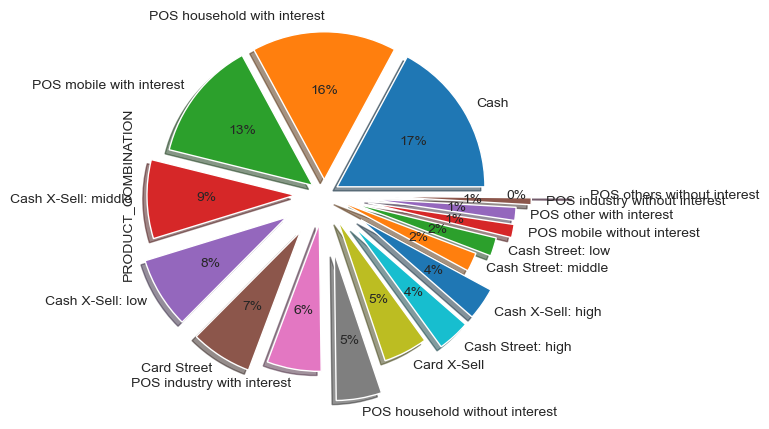

In [96]:
exp = [0.1,0.1,0.1,0.2,0.3,0.3,0.2,0.4,0.2,0.3,0.3,0.1,0.2,0.3,0.3,0.4,0.7]
PA["PRODUCT_COMBINATION"].value_counts().plot.pie(explode=exp,autopct='%.0f%%',shadow=True)


<Axes: ylabel='NAME_CONTRACT_TYPE'>

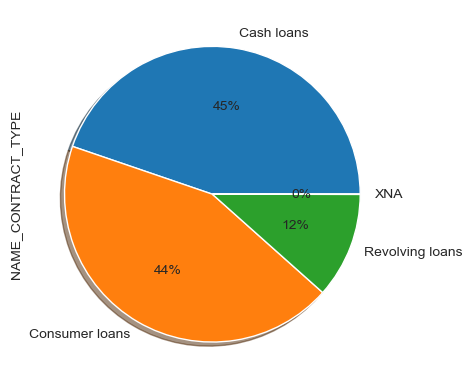

In [94]:
exp = [0.0,0.0,0.0,0.0]
PA["NAME_CONTRACT_TYPE"].value_counts().plot.pie(explode=exp,autopct='%.0f%%',shadow=True)


<Axes: ylabel='NAME_CONTRACT_STATUS'>

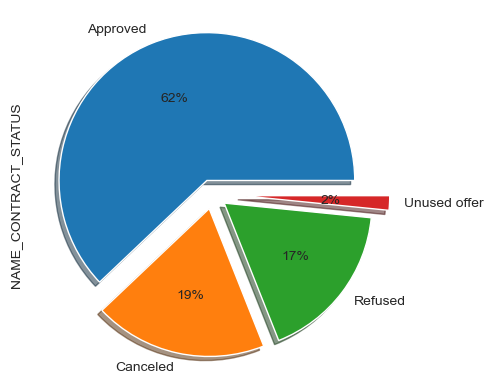

In [97]:
exp = [0.1,0.1,0.1,0.2]
PA["NAME_CONTRACT_STATUS"].value_counts().plot.pie(explode=exp,autopct='%.0f%%',shadow=True)


# BIVARIATE ANALYSIS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'POS mobile with interest'),
  Text(1, 0, 'Cash X-Sell: low'),
  Text(2, 0, 'Cash X-Sell: high'),
  Text(3, 0, 'Cash X-Sell: middle'),
  Text(4, 0, 'Cash Street: high'),
  Text(5, 0, 'Cash'),
  Text(6, 0, 'POS household without interest'),
  Text(7, 0, 'POS household with interest'),
  Text(8, 0, 'POS other with interest'),
  Text(9, 0, 'Card X-Sell'),
  Text(10, 0, 'POS mobile without interest'),
  Text(11, 0, 'Card Street'),
  Text(12, 0, 'POS industry with interest'),
  Text(13, 0, 'Cash Street: low'),
  Text(14, 0, 'POS industry without interest'),
  Text(15, 0, 'Cash Street: middle'),
  Text(16, 0, 'POS others without interest')])

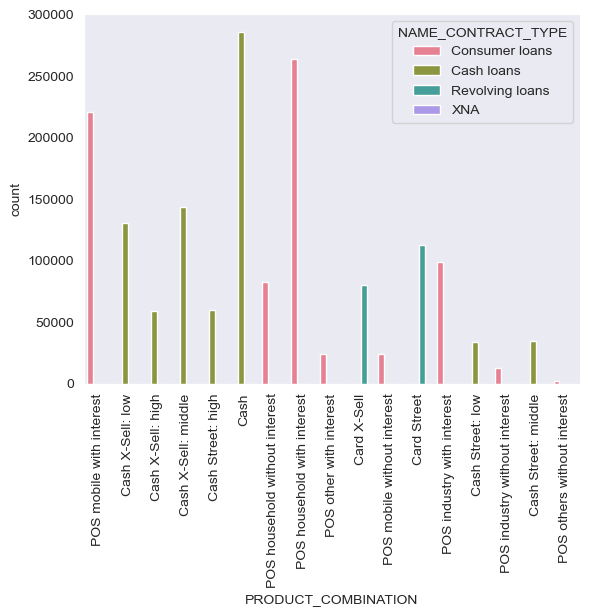

In [98]:
sns.countplot(x = "PRODUCT_COMBINATION", data = PA,palette="husl",hue="NAME_CONTRACT_TYPE")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Consumer loans'),
  Text(1, 0, 'Cash loans'),
  Text(2, 0, 'Revolving loans'),
  Text(3, 0, 'XNA')])

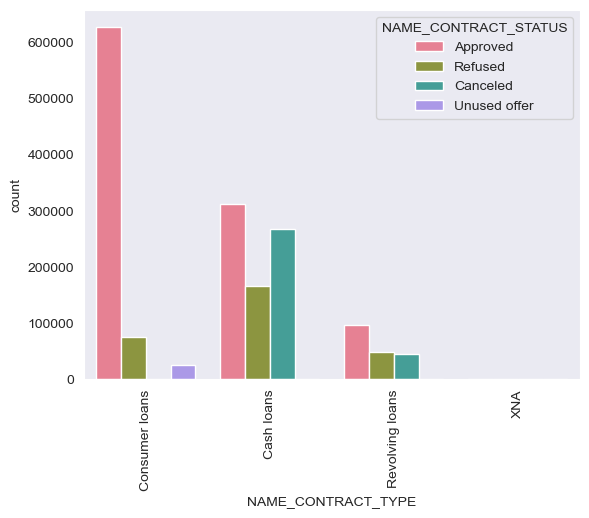

In [99]:
sns.countplot(x = "NAME_CONTRACT_TYPE", data = PA,palette="husl",hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'XAP'),
  Text(1, 0, 'XNA'),
  Text(2, 0, 'Repairs'),
  Text(3, 0, 'Everyday expenses'),
  Text(4, 0, 'Car repairs'),
  Text(5, 0, 'Building a house or an annex'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Journey'),
  Text(8, 0, 'Purchase of electronic equipment'),
  Text(9, 0, 'Medicine'),
  Text(10, 0, 'Payments on other loans'),
  Text(11, 0, 'Urgent needs'),
  Text(12, 0, 'Buying a used car'),
  Text(13, 0, 'Buying a new car'),
  Text(14, 0, 'Buying a holiday home / land'),
  Text(15, 0, 'Education'),
  Text(16, 0, 'Buying a home'),
  Text(17, 0, 'Furniture'),
  Text(18, 0, 'Buying a garage'),
  Text(19, 0, 'Business development'),
  Text(20, 0, 'Wedding / gift / holiday'),
  Text(21, 0, 'Hobby'),
  Text(22, 0, 'Gasification / water supply'),
  Text(23, 0, 'Refusal to name the goal'),
  Text(24, 0, 'Money for a third person')])

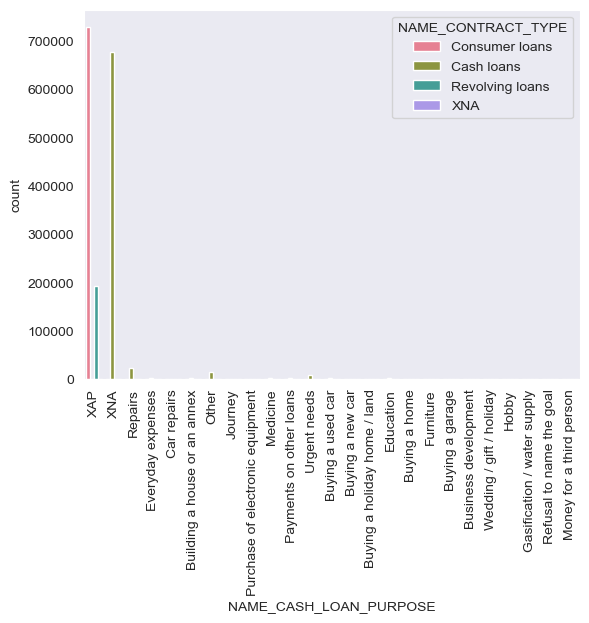

In [100]:
sns.countplot(x = "NAME_CASH_LOAN_PURPOSE", data = PA,palette="husl",hue="NAME_CONTRACT_TYPE")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'POS mobile with interest'),
  Text(1, 0, 'Cash X-Sell: low'),
  Text(2, 0, 'Cash X-Sell: high'),
  Text(3, 0, 'Cash X-Sell: middle'),
  Text(4, 0, 'Cash Street: high'),
  Text(5, 0, 'Cash'),
  Text(6, 0, 'POS household without interest'),
  Text(7, 0, 'POS household with interest'),
  Text(8, 0, 'POS other with interest'),
  Text(9, 0, 'Card X-Sell'),
  Text(10, 0, 'POS mobile without interest'),
  Text(11, 0, 'Card Street'),
  Text(12, 0, 'POS industry with interest'),
  Text(13, 0, 'Cash Street: low'),
  Text(14, 0, 'POS industry without interest'),
  Text(15, 0, 'Cash Street: middle'),
  Text(16, 0, 'POS others without interest')])

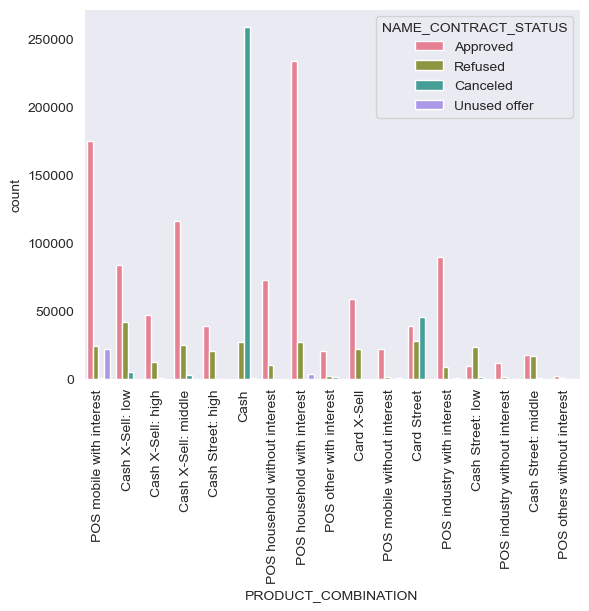

In [102]:
sns.countplot(x = "PRODUCT_COMBINATION", data = PA,palette="husl",hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)

Observations:

- The product combination with cash is having significantly   higher in cancelled ratio of loan.

- Consumer loans are high in approved loan status. 

- Cash loan type are significantly high in cancelation of loan.

- POS mobile with interest are high in unused offers.

- Consumer loans are not having any calcelations.

# Merge both the data

In [104]:
merge_data=pd.merge(df,PA,how="inner",on="SK_ID_CURR")
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [105]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 109 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(36), int64(43), object(30)
memory usage: 1.2+ GB


# BIVARIATE ANALYSIS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'POS other with interest'),
  Text(1, 0, 'Cash X-Sell: low'),
  Text(2, 0, 'POS industry with interest'),
  Text(3, 0, 'POS household with interest'),
  Text(4, 0, 'POS mobile without interest'),
  Text(5, 0, 'Card Street'),
  Text(6, 0, 'Card X-Sell'),
  Text(7, 0, 'Cash X-Sell: high'),
  Text(8, 0, 'Cash'),
  Text(9, 0, 'Cash Street: high'),
  Text(10, 0, 'Cash X-Sell: middle'),
  Text(11, 0, 'POS mobile with interest'),
  Text(12, 0, 'POS household without interest'),
  Text(13, 0, 'POS industry without interest'),
  Text(14, 0, 'Cash Street: low'),
  Text(15, 0, 'Cash Street: middle'),
  Text(16, 0, 'POS others without interest')])

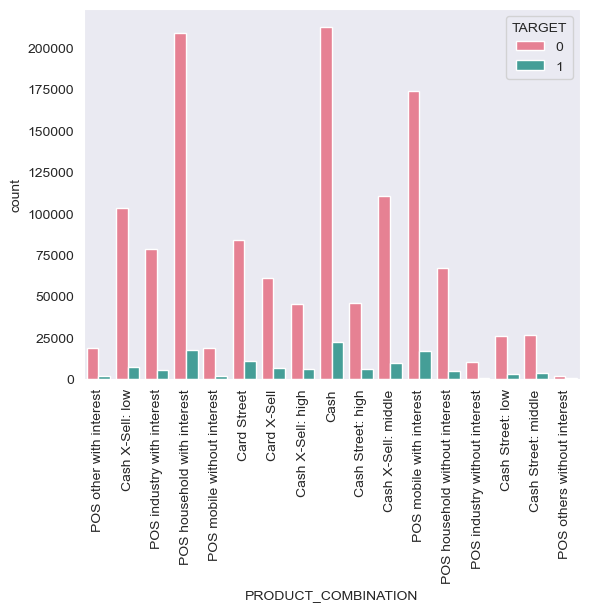

In [106]:
sns.countplot(x = "PRODUCT_COMBINATION", data = merge_data,palette="husl",hue="TARGET")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Approved'),
  Text(1, 0, 'Canceled'),
  Text(2, 0, 'Refused'),
  Text(3, 0, 'Unused offer')])

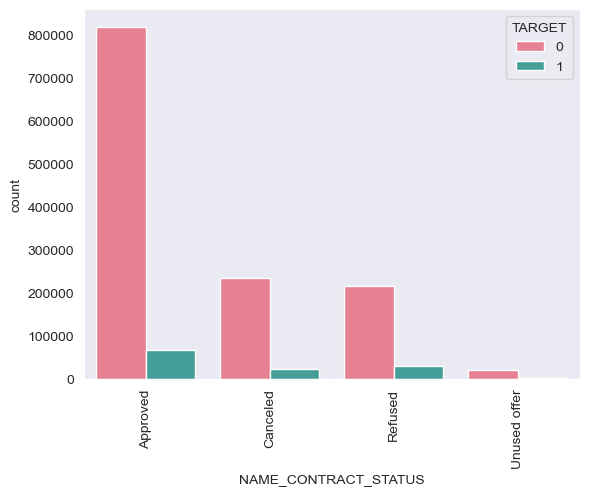

In [107]:
sns.countplot(x = "NAME_CONTRACT_STATUS", data = merge_data,palette="husl",hue="TARGET")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'POS other with interest'),
  Text(1, 0, 'Cash X-Sell: low'),
  Text(2, 0, 'POS industry with interest'),
  Text(3, 0, 'POS household with interest'),
  Text(4, 0, 'POS mobile without interest'),
  Text(5, 0, 'Card Street'),
  Text(6, 0, 'Card X-Sell'),
  Text(7, 0, 'Cash X-Sell: high'),
  Text(8, 0, 'Cash'),
  Text(9, 0, 'Cash Street: high'),
  Text(10, 0, 'Cash X-Sell: middle'),
  Text(11, 0, 'POS mobile with interest'),
  Text(12, 0, 'POS household without interest'),
  Text(13, 0, 'POS industry without interest'),
  Text(14, 0, 'Cash Street: low'),
  Text(15, 0, 'Cash Street: middle'),
  Text(16, 0, 'POS others without interest')])

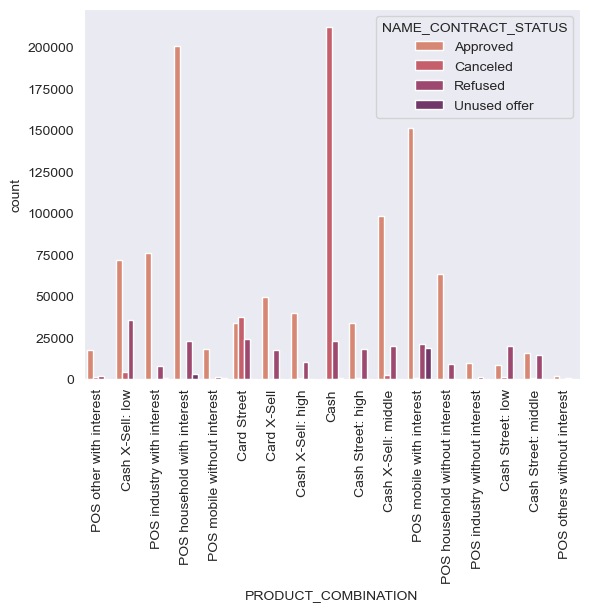

In [108]:
sns.countplot(hue = "NAME_CONTRACT_STATUS", data = merge_data,palette="flare",x="PRODUCT_COMBINATION")
plt.xticks(rotation=90)

purpose of loan with target column

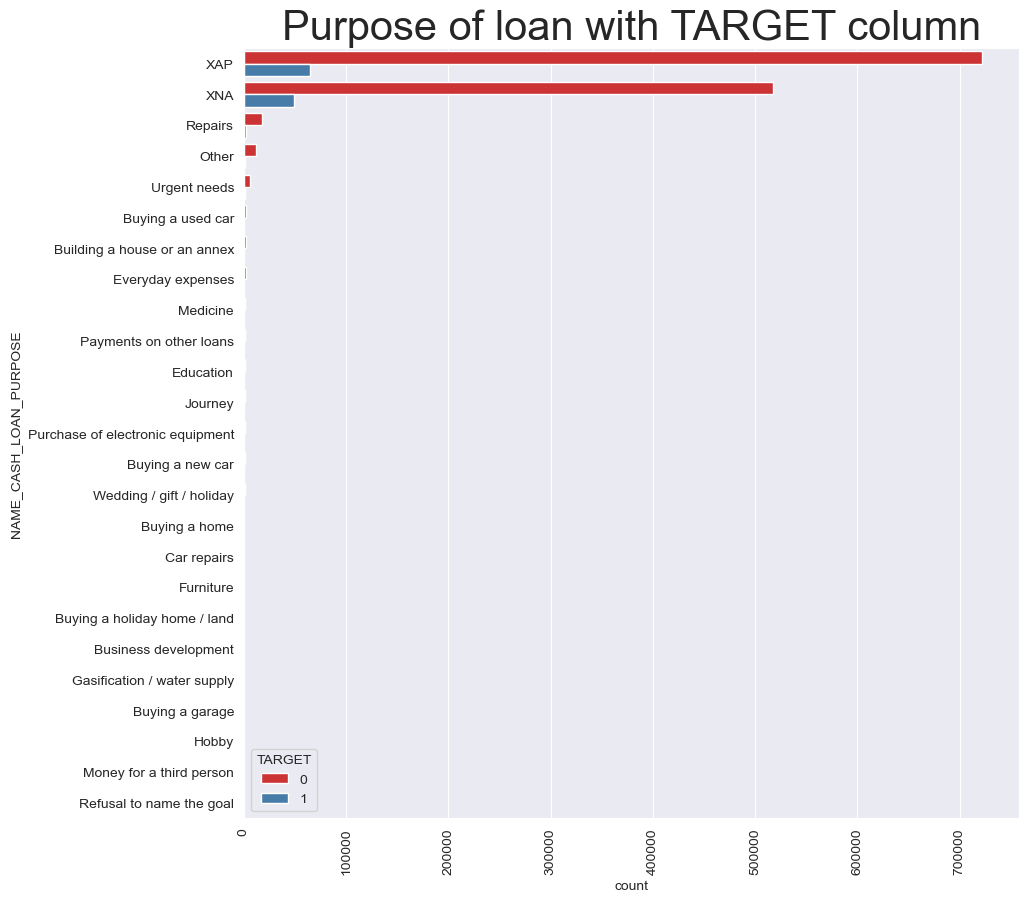

In [111]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.title('Purpose of loan with TARGET column')
sns.set_style('darkgrid')
sns.countplot(data = merge_data,palette="Set1", y= 'NAME_CASH_LOAN_PURPOSE', order=merge_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 
plt.show()

Purpose of loan with contract status

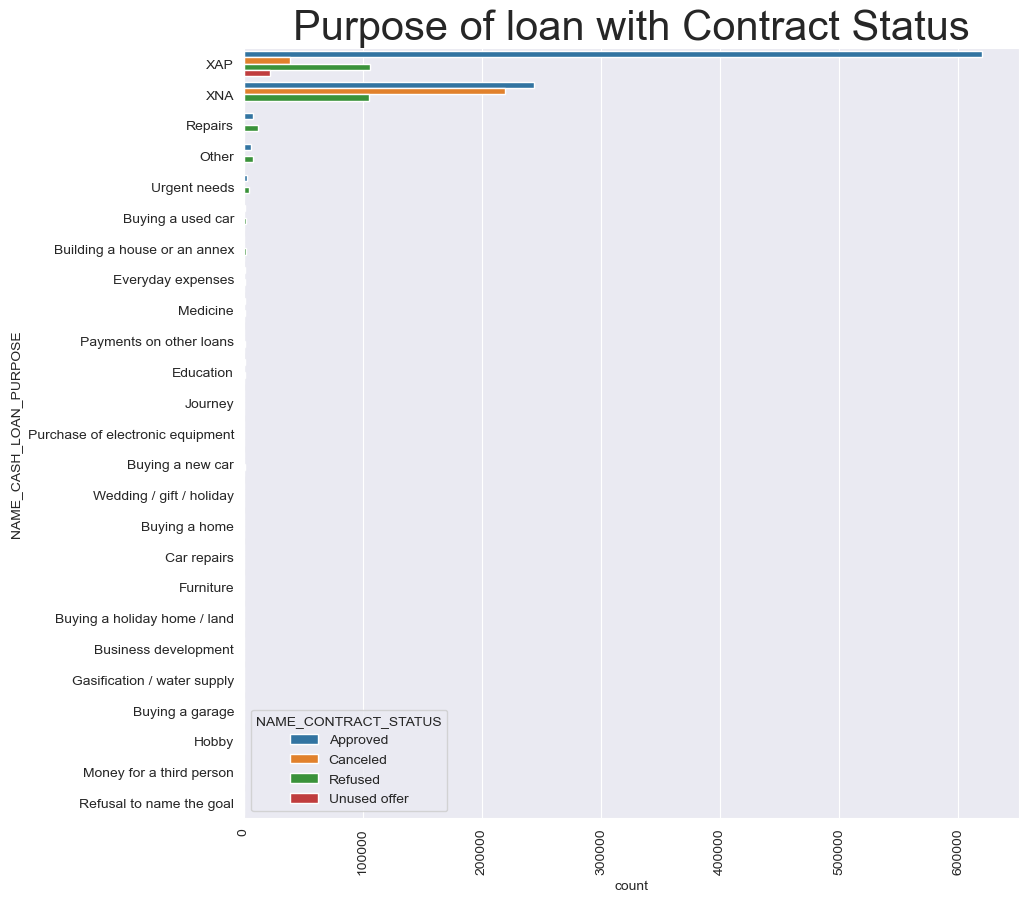

In [102]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.title('Purpose of loan with Contract Status')
sns.set_style('darkgrid')
sns.countplot(data = merge_data, y= 'NAME_CASH_LOAN_PURPOSE', order=merge_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 
plt.show()

Observations:

- The product combination with cash is having significantly higher in canceled ratio of loan.
- Consumer loans are high in approved loan status.
- Most of loan rejection was from 'Repairs'
- Most of the Repairs are with payment difficulties.

In [103]:
Target_1=merge_data[merge_data['TARGET']==1]
Target_0=merge_data[merge_data['TARGET']==0]

# Correlation

<Axes: >

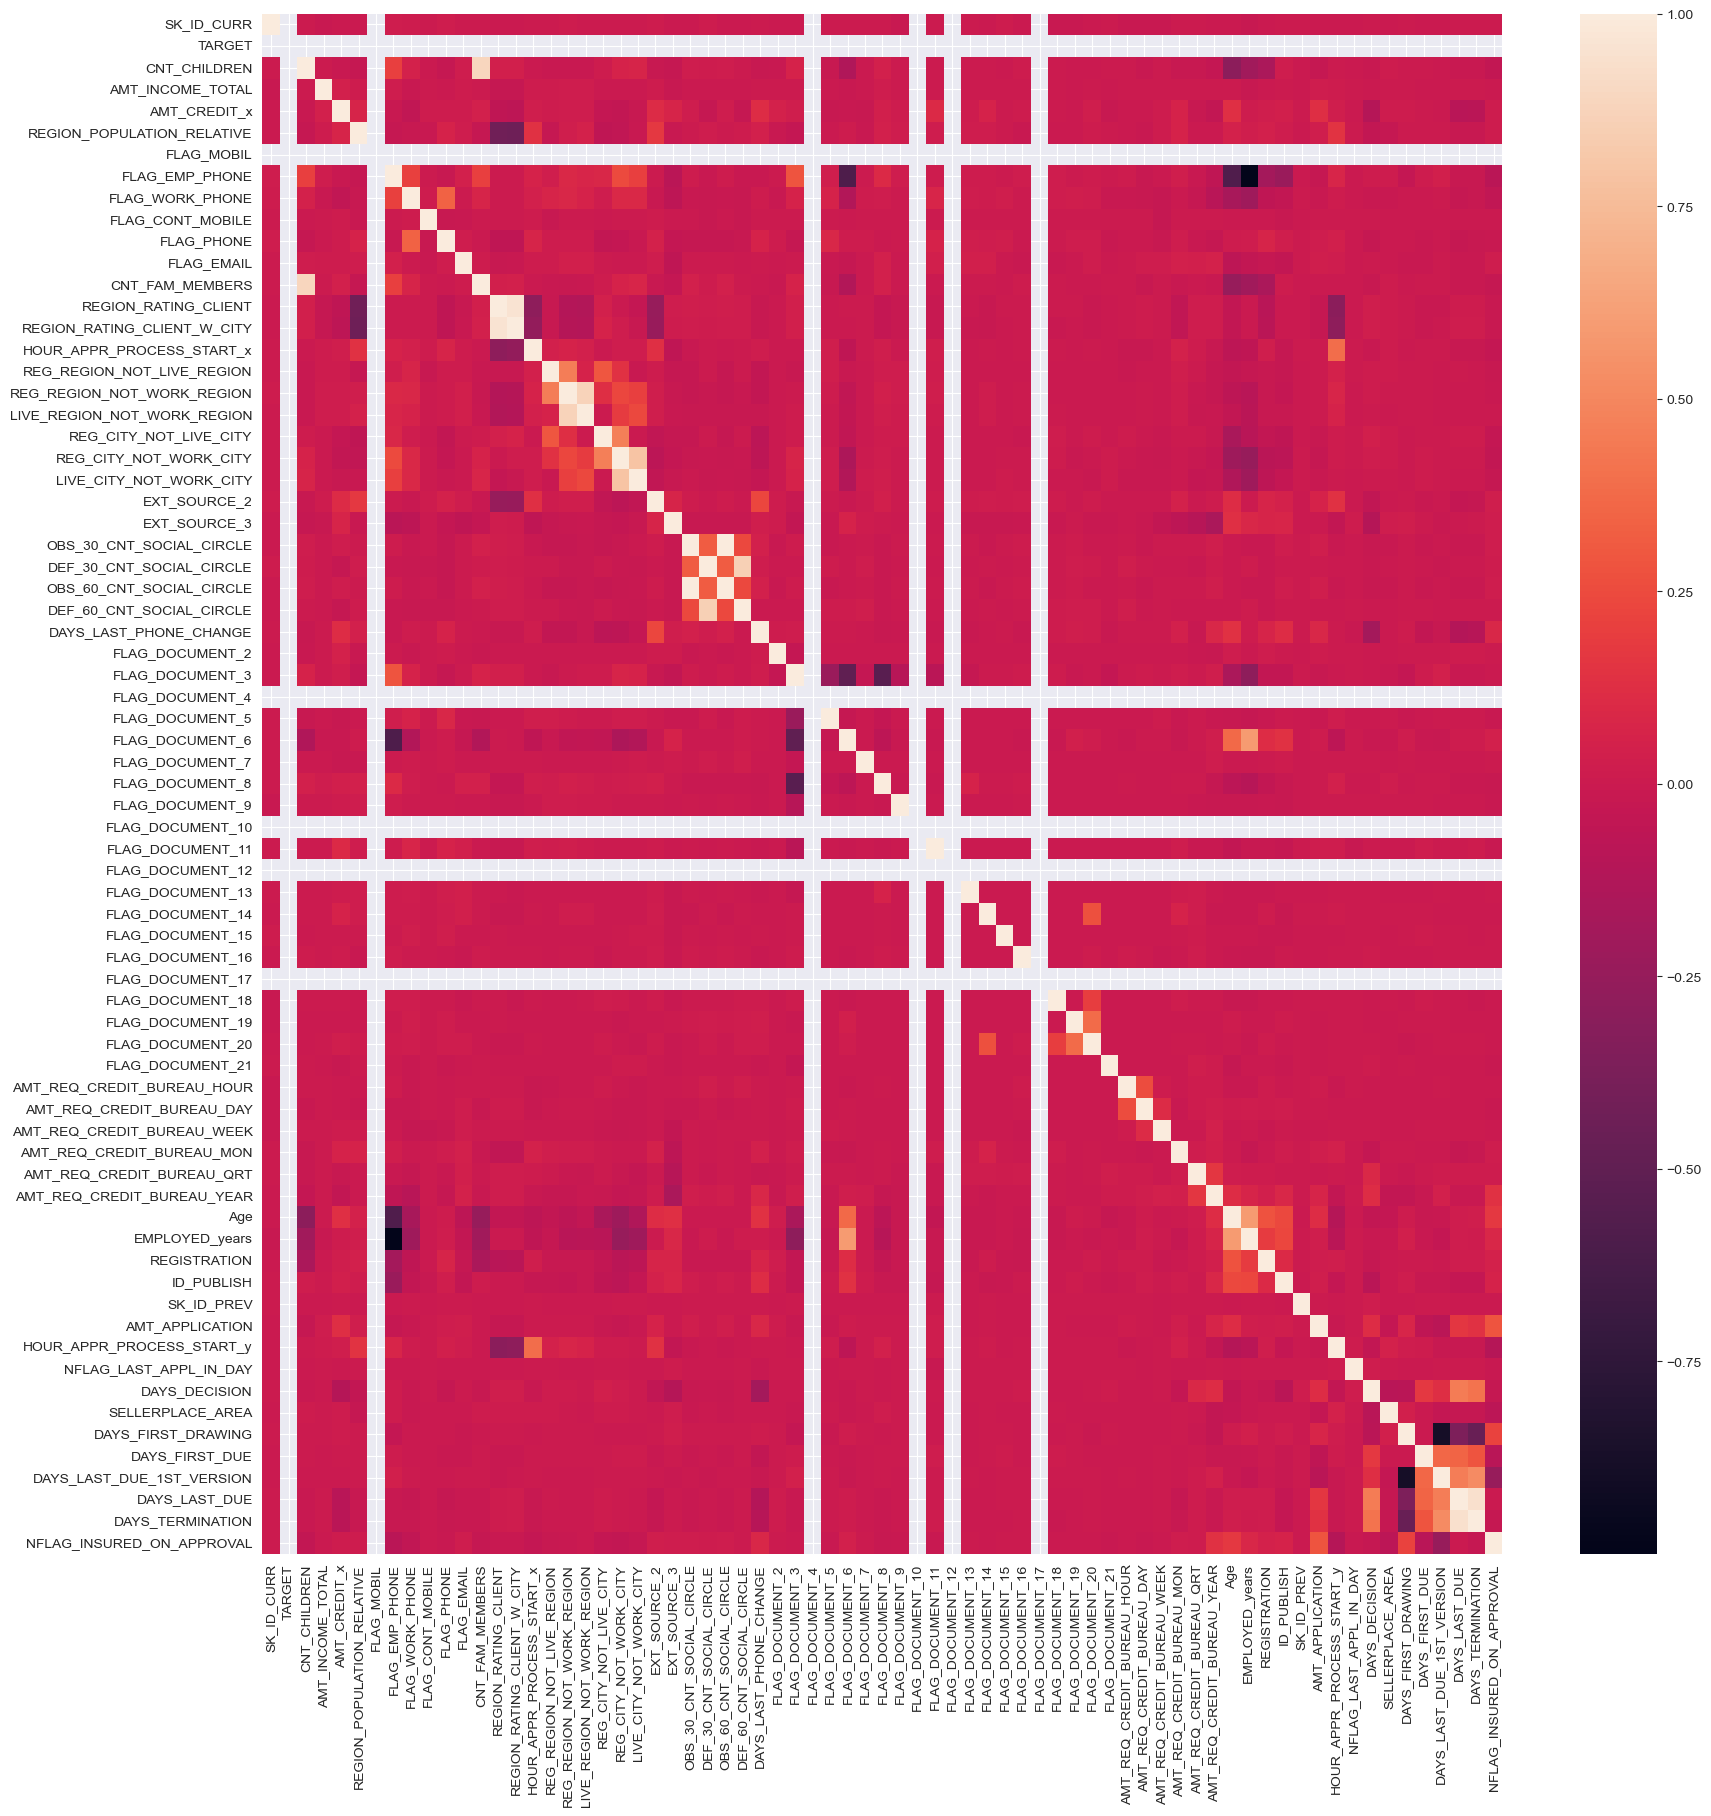

In [104]:
plt.figure(figsize=(20,20))
corr_1 = Target_1.corr(numeric_only=True)
sns.heatmap(corr_1)

In [105]:
# Top 10 correlated variables: Target1 dataaframe

#corr_1 = Target1.corr(numeric_only=True)
corrdf = corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
3983,EMPLOYED_years,FLAG_EMP_PHONE,1.00
1870,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
1007,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
4967,DAYS_TERMINATION,DAYS_LAST_DUE,0.94
854,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
4822,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.89
1295,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87
1942,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
1511,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.79
4031,EMPLOYED_years,Age,0.59


<Axes: >

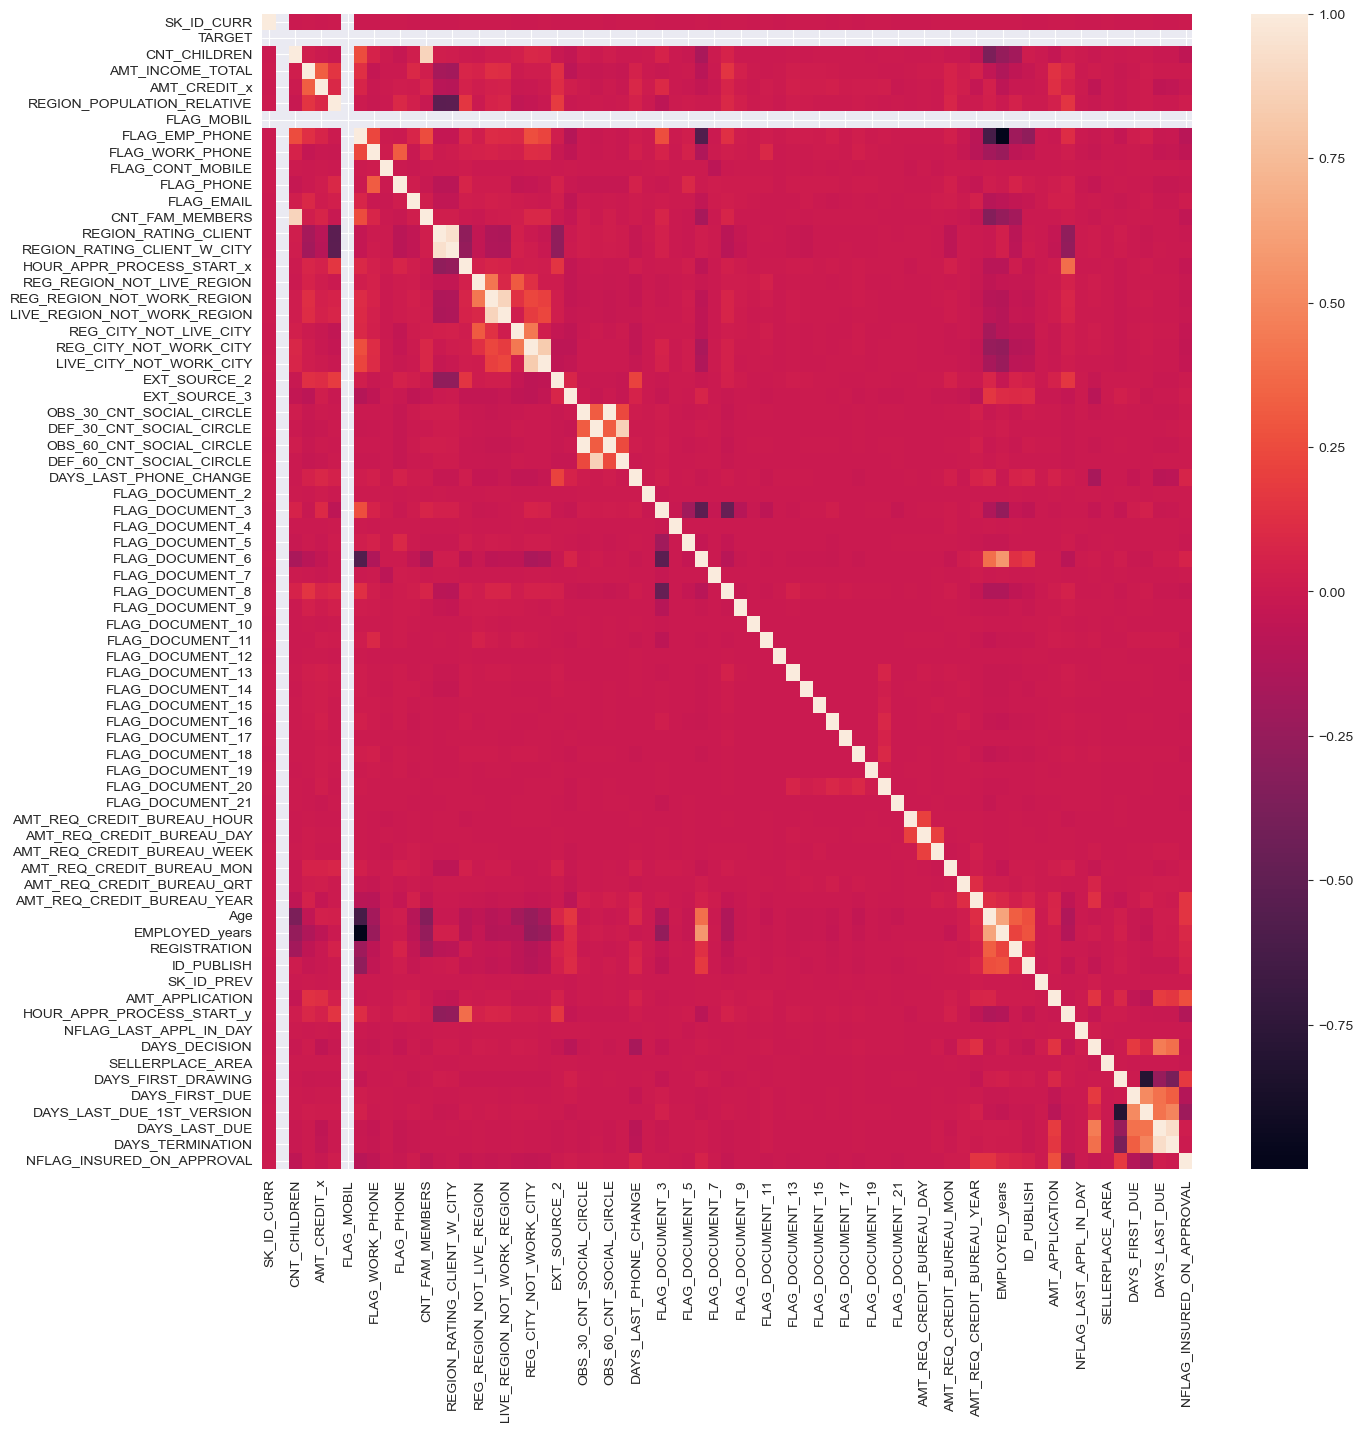

In [106]:
plt.figure(figsize=(15,15))
corr_0 = Target_0.corr(numeric_only=True)
sns.heatmap(corr_0)

In [107]:

corrdf = corr_0.where(np.triu(np.ones(corr_0.shape), k=1).astype(bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


,Var1,Var2,Correlation
1870,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
3983,EMPLOYED_years,FLAG_EMP_PHONE,1.00
1007,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.94
4967,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
854,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1295,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.88
1942,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
1511,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.84
4822,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.80
3912,Age,FLAG_EMP_PHONE,0.63


Observation:

- From the above correlation analysis we can say that the highest corelation (1.0) is between (EMPLOYED_years with FLAG_EMP_PHONE) & (OBS_60_CNT_SOCIAL_CIRCLE 	WITH OBS_30_CNT_SOCIAL_CIRCLE).